# Predict the species of an Iris flower (Setosa, Versicolor, Virginica) based on its features:

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
dataset = sns.load_dataset('iris')

In [3]:
dataset.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [4]:
dataset.shape
#clearyly dataset has 150 rows and 5 columsn

(150, 5)

In [5]:
dataset.info()
#clearly species target variable is in object type so change it as string and further encoe it for bettter perfomance 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

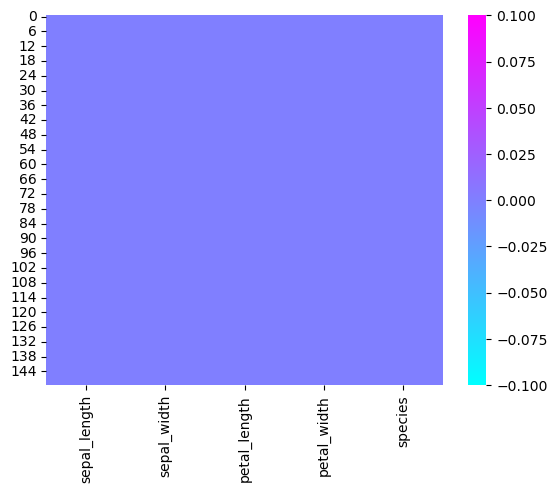

In [7]:
dataset.isnull().mean()
sns.heatmap(dataset.isnull() ,cmap = 'cool')
#clearly there are no null or noisy data in the dataset

# Ml work

In [8]:
df_ml = dataset.copy()
#df_ml data set for ml work

In [9]:
df_ml.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [10]:
x = df_ml.drop('species' ,axis = 1)
y = df_ml.iloc[: ,-1]
# y = df_ml.pop('species')
#split the dataset into X and Y varibales

In [11]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [12]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
y.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [14]:
y.shape

(150,)

In [15]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
x.shape

(150, 4)

### Encode the target variable 

In [17]:
# pd.get_dummies(y,drop_first=True)

In [18]:
y = y.map({'setosa':0, 'versicolor' :1 , 'virginica' :2})

In [19]:
y.value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()

In [22]:
# x_scaled =  sc.fit_transform(x)
#it is because tree-based models like Random Forest do not require feature scaling, and scaling can actually disrupt their natural feature split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)
#70% of dataset is for training and 30% is for the testing phase

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfmodel = RandomForestClassifier(n_estimators=8)

In [27]:
rfmodel.fit(x_train , y_train)
#fitting the randomforest model classifier

RandomForestClassifier(n_estimators=8)

In [28]:
rfmodel.score(x_train , y_train)*100
# clearly the training has 100% accuracy

100.0

In [29]:
y_predict =  rfmodel.predict(x_test)

In [30]:
from sklearn.metrics import classification_report ,confusion_matrix ,accuracy_score

<Axes: >

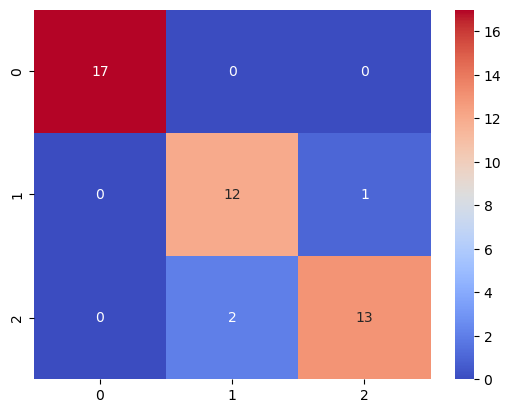

In [31]:
sns.heatmap( confusion_matrix(y_predict , y_test)  ,cmap='coolwarm' ,annot=True)

In [32]:
print(classification_report(y_test , y_predict))
#clearly the accuracy of the model is close to  98%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.86      0.89        14
           2       0.87      0.93      0.90        14

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [33]:
round(accuracy_score( y_predict , y_test)*100 ,4)

93.3333

### Optimization with GridSearchCV for RandomForest model

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
#initilse paramgrid
paramgrid = {
    'n_estimators': [50, 100, 200],             # Number of trees in the forest to try
    'max_depth': [None, 5, 10, 20],             # Maximum depth of each tree (None means no limit)
    'min_samples_split': [2, 5, 10],             # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],               # Minimum samples required at leaf nodes
    'max_features': ['sqrt', 'log2'],            # Number of features to consider when looking for best split
    'bootstrap': [True, False]                    # Whether bootstrap samples are used when building trees
}

In [73]:
gcv  = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid= paramgrid,
    scoring= 'accuracy',
    n_jobs= -1 ,
    cv= 5
)

In [74]:
gcv.fit(x_train , y_train)   

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [75]:
gcv_y_predict =  gcv.predict(x_test)

In [76]:
print(gcv.best_params_)

{'bootstrap': True, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}


In [77]:
print(gcv.best_estimator_)

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=50)


In [78]:
round(accuracy_score(gcv_y_predict ,y_test)*100 ,4)

97.7778

In [79]:
print(classification_report(y_test ,gcv_y_predict))
#using the gridsearccv

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [80]:
print(classification_report(y_test , y_predict))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.86      0.89        14
           2       0.87      0.93      0.90        14

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



### conclusin -1
#### manual randomforest estimatioor =10 and optimised randomforest are having the same accuracy level 

## Comparision with other models # knn ,svc 

### KNN MODEL

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knn = KNeighborsClassifier(n_neighbors=5)

In [83]:
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [84]:
round(knn.score(x_train , y_train)*100 ,4)
#knn has 98.052% accuracy in traning phase

98.0952

In [85]:
knn_y_predict =  knn.predict(x_test)

In [86]:
round(accuracy_score(knn_y_predict , y_test)*100 ,4)

95.5556

In [87]:
print(classification_report(knn_y_predict , y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.86      1.00      0.92        12
           2       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [88]:
print(round(accuracy_score(knn_y_predict , y_test)*100 ,4))
#for n_neighbours  = 5 model got the 95.5556 % of accuracy 

95.5556


### Optimization with loop for KNN model

In [89]:
knn_loop_acc = []

In [90]:
for i in range(1,100):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(x_train , y_train)
    knn_y_predict_i = knn_i.predict(x_test)
    acc = round(accuracy_score(knn_y_predict_i , y_test)*100 ,4)
    knn_loop_acc.append(acc)

In [91]:
print(max(knn_loop_acc))

97.7778


In [92]:
len(knn_loop_acc)

99

Text(13.319444444444445, 0.5, 'n_neighbours')

<Figure size 2400x1500 with 0 Axes>

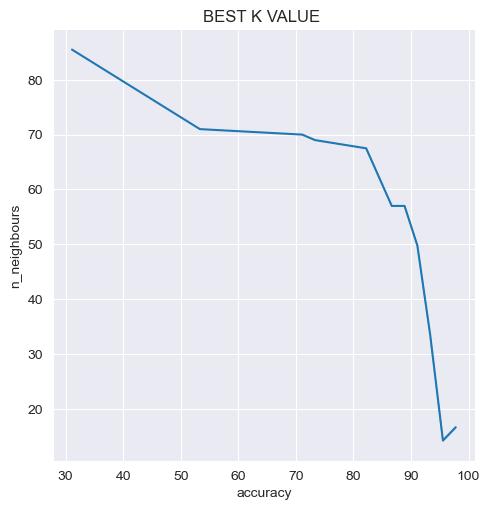

In [93]:
plt.figure(figsize=(8, 5) ,dpi=300)
sns.relplot(kind= 'line',
            errorbar = ('ci',False), 
            x = knn_loop_acc , y= range(1,100),
           # aspect=8/3),
            height= 5
           )
plt.title('BEST K VALUE ')
sns.set_style('darkgrid')
plt.xlabel('accuracy')
plt.ylabel('n_neighbours')
# clearly from the plot the best accuracy lies in between (10-20 ) K

In [94]:
knn_loop_acc_10_20 = []

In [95]:
for i in range(10,21):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(x_train , y_train)
    knn_y_predict_i = knn_i.predict(x_test)
    acc = round(accuracy_score(knn_y_predict_i , y_test)*100 ,4)
    knn_loop_acc_10_20.append(acc)

In [96]:
max(knn_loop_acc_10_20)

97.7778

In [97]:
knn_loop_acc_10_20.index(97.7778)+1

4

### Conclusion -2
#### Clearly for n_neighbours = 4  has the accurac of 97.7778  which is greater than the default 5 neighbours
#### After optimisation the knn and randomforest model has the same accuracy level

### SVC MODEL with gridsearchcv

In [98]:
from sklearn.svm import SVC

In [99]:
paramgrid_svc = [
    {
        'kernel' : ['linear'],
        'C' :[0.1, 1, 10] # if C is more its reduces the training erros ,low focus more on maximizing margin (simpler model).
        
    },
    {
        'kernel' :['poly'],
        'degree': [2, 3],
        'C': [0.1, 1, 10]
    }
]

In [100]:
gcv_svc  = GridSearchCV(
    
            estimator= SVC() ,
            param_grid=paramgrid_svc,
            cv =5
    ) 

In [101]:
gcv_svc.fit(x_train ,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10], 'degree': [2, 3],
                          'kernel': ['poly']}])

In [102]:
svc_gcv_y_predict = gcv_svc.predict(x_test)

In [103]:
print(classification_report(svc_gcv_y_predict , y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      1.00      0.96        13
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [104]:
print(round(accuracy_score(svc_gcv_y_predict ,y_test)*100 ,4))

97.7778


In [105]:
print(gcv_svc.best_params_)

{'C': 0.1, 'degree': 3, 'kernel': 'poly'}


#### From The GridSearchCV poly  kernel is more optimistic than the linear  

In [106]:
print(gcv_svc.best_estimator_)

SVC(C=0.1, kernel='poly')


## Conclusion -3 :
### Three optimistic models give the same accuracy of 97.7778 %  

In [109]:
from joblib import dump ,load
dump(gcv_svc ,'joblib_iris_ml.joblib')

['joblib_iris_ml.joblib']